# Textanalysis in Python - 
# A practial introdution 


### Natalie Widmann






# Research Questions

- [ ] How does the frequency of a certain term progress over time?

# Reading in data

In [1]:
import pandas as pd

In [2]:
path = './data/parliamentary-questions_fulltext_2023.csv'
data = pd.read_csv(path, index_col=1)

In [29]:
# Explore the texts
sample_question = data.question_text.values[0]
sample_question

'PE741.317v01-00Question for written answer E-000080/2023\nto the Commission\nRule 138\nGianantonio Da Re (ID)\nSubject: Suspension of the payment of funds to Morocco pending the completion of investigations \ninto the ‘Qatargate’ financial scandal \nAt a press conference held on 5 January 2023, the Vice-President of the Commission / High \nRepresentative of the Union for Foreign Affairs and Security Policy, Josep Borrell, and the Moroccan \nMinister for Foreign Affairs, Nasser Bourita, announced that EU-Morocco relations were to be \nstrengthened. Apart from the financing agreements worth almost EUR 500 million already envisaged \nfor 2022/2023, Morocco is due to receive EUR 1.6 billion from the EU over the period 2021-2027, \nwhich is the most of any country in the region. According to Mr Bourita, the partnership between the \nEU and Morocco has three dimensions: neighbourhood, values and interests. Besides this, the EU \nVice-President / High Representative announced the launch of t

In [13]:
sample_answer = data.answer_text.values[10]
sample_answer

'EN\nE-000101/2023\nAnswer given by Mr Sinkevičius\non behalf of the European Commission\n(17.3.2023)\n1. The EU Timber Regulation (EUTR)1 prohibits the placement on the EU market of illegally \nharvested timber and derived products. The Regulation on deforestation and forest \ndegradation2 will ban the placing on the EU market or the export of products issued from land \ndeforested or degraded after 2020, or produced illegally. The Habitats and the Birds \nDirectives3 establish rules on species and sites protection and management, which are \nrelevant for forestry activities. Specifically, when it comes to energy, the Renewable Energy \nDirective (RED)4 sets sustainability criteria for biofuels, bioliquids and biomass fuels, with \nthe aim to ensure that forest biomass used for energy is sourced sustainably, and to minimise \nthe risks, in terms of carbon sinks and stocks and biodiversity.\n2. The EU Forest Strategy for 20305 underlines that forests are paramount for the \nachievement

In [24]:
# Add a month column
data['document_date'] = pd.to_datetime(data['document_date'])
data['month'] = data['document_date'].dt.to_period('M')

In [27]:
# Get word frequency
def is_word_in(term, text):
    
    words = [word.lower() for word in text.split()]
    if term.lower() in words:
        return 1
    return 0

In [57]:
import matplotlib.pyplot as plt

def plot_frequency_distribution(result, word):
    fig, ax = plt.subplots(figsize=(10, 6))
    result.plot(x='month', y='contains_word', kind='bar', ax=ax, legend=False)
    plt.xlabel('Month')
    plt.ylabel('Word Frequency')
    plt.title('Word Frequency by Month'.format(word))

    # Customizing the plot
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Word Frequency', fontsize=12)
    plt.title(f'Word Frequency of {word} by Month', fontsize=14, fontweight='bold')

    # Customizing the tick labels and grid
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    #ax.yaxis.grid(True)

    # Adding data labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

    plt.show()

In [64]:
# Preprocessing
data['question_text'] = data['question_text'].str.replace('\n', ' ')
data['answer_text'] = data['answer_text'].str.replace('\n', ' ')

In [65]:
word = 'Russia'

data['contains_word'] = data['question_text'].apply(lambda text: is_word_in(word, text) if isinstance(text, str) else 0)
result_question = data.groupby(['month']).contains_word.sum()

data['contains_word'] = data['answer_text'].apply(lambda text: is_word_in(word, text) if isinstance(text, str) else 0)
result_answer = data.groupby(['month']).contains_word.sum()

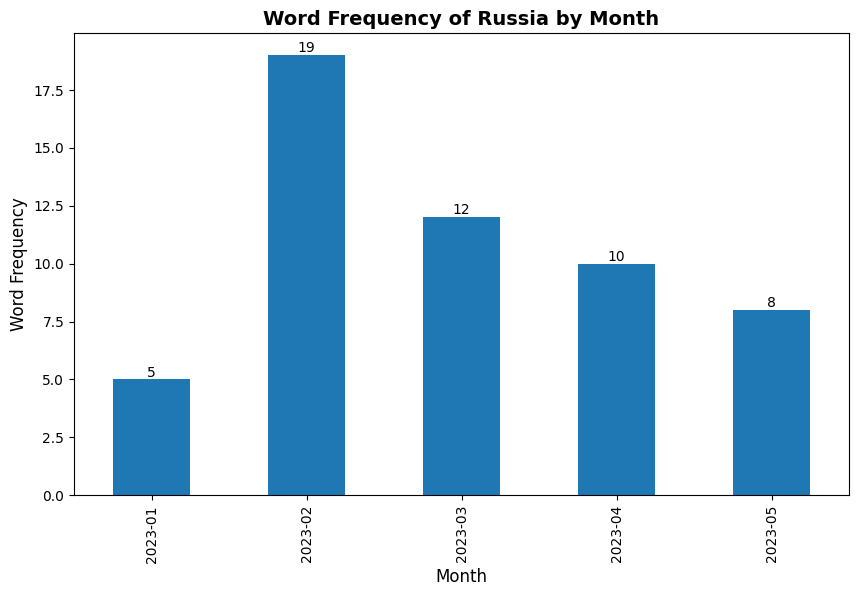

In [63]:
plot_frequency_distribution(result_question, word)

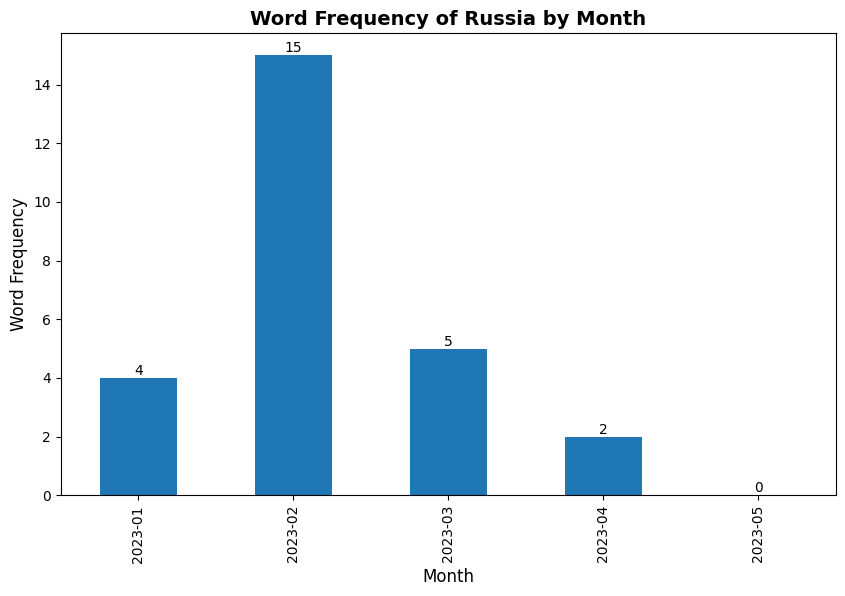

In [60]:
plot_frequency_distribution(result_answer, word)

In [35]:
is_word_in('11.1.2023', sample_question)

1

In [25]:
data

,Unnamed: 0.1,document_identifier,document_title,document_title_en,document_type,document_parliamentary_term,document_date,document_public_register_notation,document_creator_person,document_creator_organization,...,document_answers_pdf,document_answers_doc,document_annexes_pdf,document_annexes_doc,document_ep_number,document_URI,question_text,answer_text,text,month
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,E-9-2023-000080,Suspension of the payment of funds to Morocco ...,Suspension of the payment of funds to Morocco ...,Written question,9,2023-01-11,NaN,Gianantonio Da Re,NaN,...,https://data.europarl.europa.eu/distribution/r...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.317,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.317v01-00Question for written answer E-0...,EN\nE-000080/2023\nAnswer given by Mr Várhelyi...,PE741.317v01-00Question for written answer E-0...,2023-01
1,1,E-9-2023-000114,Shortage of medicines in Greece and the EU,Shortage of medicines in Greece and the EU,Written question,9,2023-01-16,NaN,Lefteris Nikolaou-Alavanos,NaN,...,https://data.europarl.europa.eu/distribution/r...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.347,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.347v01-00Question for written answer E-0...,EN\nE-000114/2023\nAnswer given by Ms Kyriakid...,PE741.347v01-00Question for written answer E-0...,2023-01
2,2,E-9-2023-000012,Declaration of the state of emergency in Peru ...,Declaration of the state of emergency in Peru ...,Written question,9,2023-01-05,NaN,Manu Pineda,NaN,...,https://data.europarl.europa.eu/distribution/r...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.232,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.232v01-00Question for written answer E-0...,EN\nE-000012/2023\nAnswer given by High Repres...,PE741.232v01-00Question for written answer E-0...,2023-01
3,3,E-9-2023-000074,Shortage of medicines,Shortage of medicines,Written question,9,2023-01-11,NaN,Maria Spyraki,NaN,...,https://data.europarl.europa.eu/distribution/r...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.310,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.310v01-00Question for written answer E-0...,(English version)\nQuestion for written answer...,PE741.310v01-00Question for written answer E-0...,2023-01
4,4,E-9-2023-000034,Emergency interventions to address high energy...,Emergency interventions to address high energy...,Written question,9,2023-01-09,NaN,Cristian-Silviu Buşoi,NaN,...,https://data.europarl.europa.eu/distribution/r...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.254,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.254v01-00Question for written answer E-0...,EN\nE-000034/2023\nAnswer given by Ms Simson\n...,PE741.254v01-00Question for written answer E-0...,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1498,P-9-2023-001267,EU response to the Egyptian President’s order ...,EU response to the Egyptian President’s order ...,EP priority written question,9,2023-04-19,NaN,Mounir Satouri,NaN,...,NaN,NaN,NaN,NaN,PE747.332,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.332v01-00Priority question for written a...,,PE747.332v01-00Priority question for written a...,2023-04
1499,1499,P-9-2023-001146,Most efficient installations in the sectors co...,Most efficient installations in the sectors co...,EP priority written question,9,2023-04-05,NaN,Marian-Jean Marinescu,NaN,...,NaN,NaN,NaN,NaN,PE747.143,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.143v02-00Priority question for written a...,,PE747.143v02-00Priority question for written a...,2023-04
1500,1500,P-9-2023-001529,Workers’ rights in Myanmar under the MADE in M...,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,9,2023-05-10,NaN,Marianne Vind,NaN,...,NaN,NaN,NaN,NaN,PE749.414,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE749.414v01

In [20]:
# Join answers and questions texts together to see if the word occurs in any of the documents
data[['question_text', 'answer_text']] = data[['question_text', 'answer_text']].fillna(value='')
data['text'] = data['question_text'].str.cat(data['answer_text'], sep=' -- ')

# Clean text by replacing newline
data['text'] = data['text'].str.replace('\n', ' ')

In [21]:
data.text.values[4]

'PE741.254v01-00Question for written answer E-000034/2023 to the Commission Rule 138 Cristian-Silviu Buşoi (PPE) Subject: Emergency interventions to address high energy prices I welcome the recent proposals for emergency interventions to address the high energy prices, but at  the same time I believe that following the ordinary legislative proposal would have allowed Parliament  to amend points that lacked clarity and improve the text. Proper implementation by all parties  concerned is also an urgent need. Given this: 1. How will reductions in consumption be covered if the impact on dispatchable customers is less  than 10 %? 2. What kind of final electricity consumers will benefit from public interventions in setting the price of  electricity, and does new Regulation 1854/2022 cover hospitals, educational establishments,  town halls, state-owned companies? 3. If the measure in Article 10(4)(b) of Regulation 1854/2022 is applied, is this with or without the  payment of compensation to n